In [57]:
import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
class MLP:  
    def __init__(self, n_hidden, input_distr = [0, 2], hidden_distr = [0, 2], bias_distr = [-2,2]):
        self.n_hidden = n_hidden
        self.input_distr = input_distr
        self.hidden_distr = hidden_distr
        self.bias_distr = bias_distr
        self.w1 = np.random.normal(input_distr[0], input_distr[1], n_hidden)
        self.w2 = np.random.normal(hidden_distr[0], hidden_distr[1], n_hidden)
        self.b1 = np.random.uniform(bias_distr[0], bias_distr[1], 1)
    
    def output(self, x):
        output = 0
        for i in range(self.n_hidden):
            tmp = np.tanh(self.w1[0]*x -self.b1) * self.w2[i]
            output = output + tmp
        return output
    
    def printWeights(self):
        print('Input Weights: ', self.w1)
        print('\n\n Hidden Weights: ', self.w2)
        print('\n\n Bias: ', self.b1)

In [59]:
number_of_objects = 50
hidden = 10
input_distribution = [0, 2]
hidden_distirbution = [0, 1]
bias_distirbution = [-2, 2]
input = np.linspace(-2, 2, 50)
MLPs = []
outputs = []
for m in range(number_of_objects):
    mlp = MLP(10, input_distribution, hidden_distirbution, bias_distirbution)
    out = mlp.output(input)
    MLPs.append(mlp)
    outputs.append(out)


MLPs_2 = []
outputs_2 = []
input_distribution_2 = [0, 0.5]
for m in range(number_of_objects):
    mlp = MLP(10, input_distribution, hidden_distirbution, bias_distirbution)
    out = mlp.output(input)
    MLPs_2.append(mlp)
    outputs_2.append(out)
    

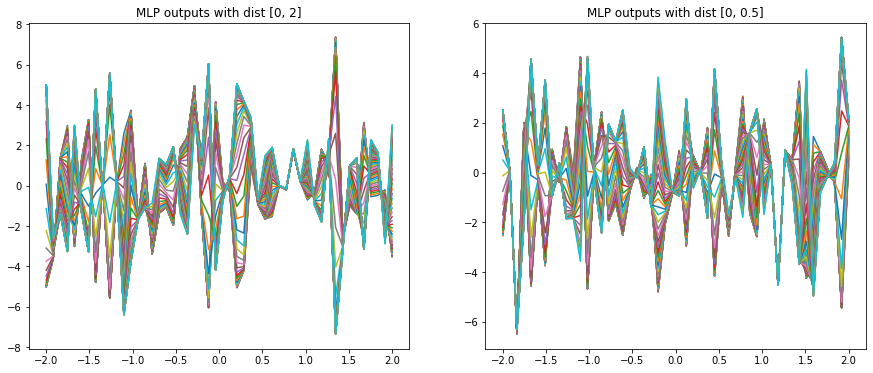

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(input, outputs)
ax1.set_title("MLP outputs with dist [0, 2]")
ax2.plot(input, outputs_2)
ax2.set_title("MLP outputs with dist [0, 0.5]")

plt.show()


Input Weights:  [ 2.17693003  1.43575067 -0.10955823  1.15708686 -1.90434474 -1.09183778
  1.00694038 -1.37119495  2.4719918   1.8519623 ]


 Hidden Weights:  [ 0.38542254 -0.01385616 -0.47748769  1.07917801 -1.53439566  1.37839844
 -0.38080363 -0.19577303 -0.92480444 -0.41572232]


 Bias:  [0.67118331]
Input Weights:  [-2.87330753 -3.20150273  0.88970448 -1.87510669  0.33952711  0.35214749
 -1.65191176  1.35392638 -0.63653519  1.35406841]


 Hidden Weights:  [-0.89982449  1.59877226  0.80273068 -2.32517629  0.15103803  0.25741307
  1.31915619  1.14489589  0.63275191 -0.25401642]


 Bias:  [-0.83024038]


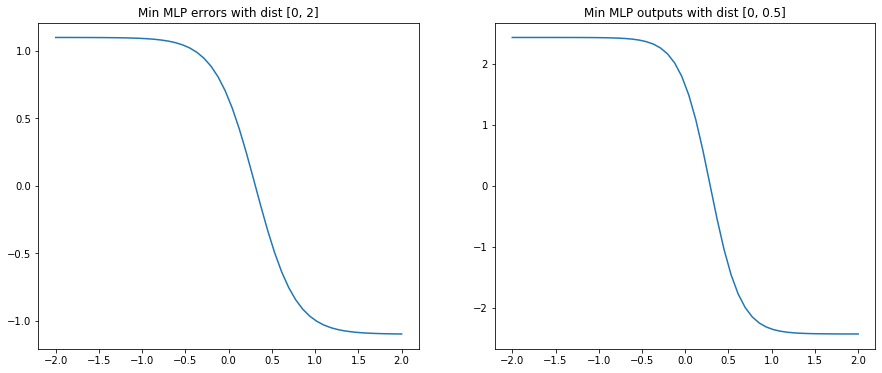

In [63]:
gx = np.linspace(2, -2, 50)

err1 = []
err2 = []

for o in range(len(outputs)):
    err1.append(np.sqrt(np.sum(pow(gx-outputs[o], 2))))
    err2.append(np.sqrt(np.sum(pow(gx-outputs[o], 2))))
    

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(input, outputs[np.argmin(err1)])
ax1.set_title("Min MLP errors with dist [0, 2]")
MLPs[np.argmin(err1)].printWeights()

ax2.plot(input, outputs_2[np.argmin(err2)])
ax2.set_title("Min MLP outputs with dist [0, 0.5]")
MLPs_2[np.argmin(err2)].printWeights()

plt.show()